In [7]:
import fastwfc
import matplotlib.pyplot as plt
import numpy as np
import random

In [8]:
wfc = fastwfc.XLandWFC("samples.xml")

In [44]:
# plot_wave_list(init_waves, titles=[f"init {mutate_count[i]}" for i in range(4)])
def generate_mutated_waves(old_wave, mutate_count):
    mutated_waves = []
    wave = old_wave
    for i in range(mutate_count):
        seed,img = wfc.mutate(base_wave=wave, out_img=False, iter_count=1, new_weight=162.0)
        wave = wfc.wave_from_id(seed)
    mutated_waves.append(wave) 
    return mutated_waves
def generate_all_mutes(dot_counts, mutate_counts):
    all_muts = {}
    init_waves = {count: [wfc.wave_from_id(wfc.generate(out_img=False)[0]) for _ in range(dot_counts[idx])] for idx,count in enumerate(mutate_counts)}
    for mutate_idx,mutate_count in enumerate(mutate_counts):
        all_muts[mutate_count] = [generate_mutated_waves(init_waves[mutate_count][i], mutate_count=mutate_count) for i in range(dot_counts[mutate_idx])]
    return all_muts, init_waves
    
# plot_wave_list(mutated_waves, titles=[f"mutatted {mutate_count[i]}" for i in range(4)])

In [45]:
dot_counts = [50, 50, 50, 50]
mutate_counts = [1, 10, 20, 30]
dot_color = ['blue','#460087','#7c0062','red']
all_muts, init_waves = generate_all_mutes(dot_counts, mutate_counts)

In [46]:
from map2graph import tiles2data, get_connectity_dict, map2digraph, get_map_shortest_length_dist
from utils import id_height_distance, tilemap2heightmap, cs_divergence
import fastwfc
ids,img = wfc.generate(out_img=False)
def wave_height_distance(wave1, wave2):
    id1 = wfc.get_ids_from_wave(wave1)
    id2 = wfc.get_ids_from_wave(wave2)
    return id_height_distance(id1, id2)

def wave_height_map(wave):
    ids = wfc.get_ids_from_wave(wave)
    return tilemap2heightmap(ids) / 6.0

In [47]:
def all_muts_to_height_list(all_muts):
    all_w_list = {}
    for key in all_muts.keys():
        all_w_list[key] = []
        for muts in all_muts[key]:
            all_w_list[key].append(np.array(wave_height_map(muts[0])))
    return all_w_list

def all_mutes_to_digraphs(all_muts):
    all_digraphs = {}
    for key in all_muts.keys():
        all_digraphs[key] = []
        for muts in all_muts[key]:
            all_digraphs[key].append([map2digraph(tiles2data(wfc.get_ids_from_wave(muts[0]))) for wave in muts])
    return all_digraphs

def digraph_to_dist(digraph):
    return get_map_shortest_length_dist(digraph, norm=False)

def all_digraphs_to_dist(all_digraphs):
    all_dist = {}
    for key in all_digraphs.keys():
        all_dist[key] = []
        for digraphs in all_digraphs[key]:
            all_dist[key].append([digraph_to_dist(digraph) for digraph in digraphs])
    return all_dist

# X轴待减项
all_height_list = all_muts_to_height_list(all_muts)
all_dg = all_mutes_to_digraphs(all_muts)
all_dist = all_digraphs_to_dist(all_dg)

In [48]:
# x, y 对应初始值
init_height_list = {}
init_dist_list = {}
for key in init_waves.keys():
    init_height_list[key] = []
    init_dist_list[key] = []
    for wave in init_waves[key]:
        init_height_list[key].append(np.array(wave_height_map(wave)))
        init_dist_list[key].append(digraph_to_dist(map2digraph(tiles2data(wfc.get_ids_from_wave(wave)))))
# # 分别求x, y 与初始值的对应距离
all_x = {}
all_y = {}
for key in init_height_list.keys():
    all_x[key] = []
    for idx,w_list in enumerate(all_height_list[key]):
        init_w_array = np.array(init_height_list[key][idx])
        w_array = np.array(w_list)
        distance = np.linalg.norm(w_array - init_w_array)
        all_x[key].append(distance)
    all_y[key] = []
    for idx,dist_list in enumerate(all_dist[key]):
        init_dist = init_dist_list[key][idx]
        divergence = cs_divergence(np.array(dist_list[0]), np.array(init_dist))
        all_y[key].append(divergence)

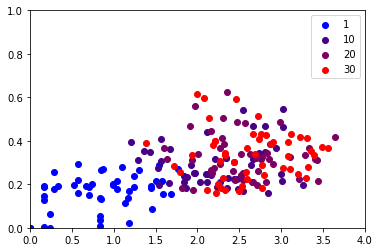

In [49]:
# 画图，变化次数分别为1, 10, 20, 30
plt.xlim(0, 4.0)
plt.ylim(0, 1.0)
plt.scatter(all_x[1], all_y[1], c=dot_color[0], label='1')
plt.scatter(all_x[10], all_y[10], c=dot_color[1], label='10')
plt.scatter(all_x[20], all_y[20], c=dot_color[2], label='20')
plt.scatter(all_x[30], all_y[30], c=dot_color[3], label='30')
# show label
plt.legend()

In [19]:
def wave_height_map(wave):
    ids = wfc.get_ids_from_wave(wave)
    return tilemap2heightmap(ids) / 6.0


In [5]:
ids,_ = wfc.generate(out_img=False)
base_wave = wfc.wave_from_id(ids)
# base_wave =wfc.build_a_open_area_wave()
new_wave,_ = wfc.mutate(base_wave=base_wave, new_weight=162, iter_count=1, out_img=False)
height1 = wave_height_map(base_wave)
height2 = wave_height_map(wfc.wave_from_id(new_wave))

print(np.linalg.norm(height1 - height2))
np_hegiht1 = np.array(height1).reshape(9,9)
np_height2 = np.array(height2).reshape(9,9)
plt.imshow(np_hegiht1)
plt.pause(0.01)
plt.imshow(np_height2)
plt.pause(0.01)
np_height12 = np_hegiht1 - np_height2
plt.imshow(np_height12)
plt.pause(0.01)

NameError: name 'wave_height_map' is not defined

In [17]:
import matplotlib.pyplot as plt
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
import cv2
import time
import fastwfc
wfc = fastwfc.XLandWFC("samples.xml")

unity3d_env = WFCUnity3DEnv()
for i in range(100):
    ids,img = wfc.generate(out_img=True)
    # plt.imshow(img)
    # plt.pause(0.01)
    unity3d_env.set_wave(wfc.wave_from_id(ids))
    unity3d_env.render_in_unity()
    bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imshow('img', bgr_img)
    cv2.waitKey(1)
    time.sleep(1.0)
    

Trying to connect to 0.0.0.0:30051
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and age

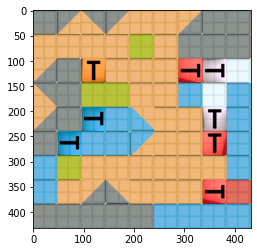

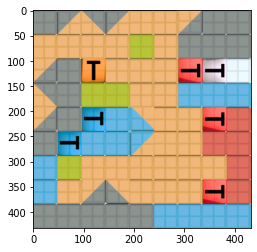

In [3]:
import matplotlib.pyplot as plt
ids,img = wfc.generate(out_img=True)
plt.imshow(img)
plt.pause(0.01)
base_wave = wfc.wave_from_id(ids)
ids2,img2 = wfc.mutate(base_wave=base_wave, new_weight=162.0, iter_count=1, out_img=True)
plt.imshow(img2)
plt.pause(0.01)

In [22]:
import matplotlib.pyplot as plt
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
unity3d_env = WFCUnity3DEnv()

# ids,img = wfc.generate(out_img=True)
# plt.imshow(img)
# plt.pause(0.01)
# base_wave = wfc.wave_from_id(ids)
base_wave =wfc.build_a_open_area_wave()
new_wave = base_wave
for i in range(100):
    # base_wave = new_wave
    new_wave,img = wfc.mutate(base_wave=base_wave, new_weight=162.0, iter_count=1, out_img=True)
    new_wave = wfc.wave_from_id(new_wave)
    while np.equal(np.array(wfc.get_ids_from_wave(base_wave)), np.array(wfc.get_ids_from_wave(new_wave))).all():
        new_wave,img = wfc.mutate(base_wave=base_wave, new_weight=162.0, iter_count=1, out_img=True)
        new_wave = wfc.wave_from_id(new_wave)
    unity3d_env.set_wave(new_wave)
    unity3d_env.render_in_unity()
    time.sleep(0.3)
    # plt.imshow(img)
    # plt.pause(0.01)


Trying to connect to 0.0.0.0:30051
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and agent
reset world and age

KeyboardInterrupt: 

In [30]:
# np is euqual.all()
is_qual = np.equal(np.array([1,2,3]), np.array([1,2,3])).all()


In [13]:

# np is all equal
all_equal = np.equal(np.array([1,2,3]), np.array([1,2,3])).all()
print(all_equal)

True
